# Table of Contents
 <p><div class="lev1"><a href="#Element-Basics"><span class="toc-item-num">1&nbsp;&nbsp;</span>Element Basics</a></div><div class="lev2"><a href="#Mapping-to-Local-Coordinates"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Mapping to Local Coordinates</a></div><div class="lev3"><a href="#Shape-Functions-Plot"><span class="toc-item-num">1.1.1&nbsp;&nbsp;</span>Shape Functions Plot</a></div><div class="lev2"><a href="#Connectivity"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Connectivity</a></div><div class="lev1"><a href="#Virtual-Work"><span class="toc-item-num">2&nbsp;&nbsp;</span>Virtual Work</a></div><div class="lev2"><a href="#Dynamic-Contribution"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Dynamic Contribution</a></div><div class="lev2"><a href="#Internal-Contribution"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Internal Contribution</a></div><div class="lev2"><a href="#External-Contribution"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>External Contribution</a></div><div class="lev3"><a href="#Gravity"><span class="toc-item-num">2.3.1&nbsp;&nbsp;</span>Gravity</a></div><div class="lev1"><a href="#Equations-of-Motion"><span class="toc-item-num">3&nbsp;&nbsp;</span>Equations of Motion</a></div><div class="lev2"><a href="#Dynamic-Contribution"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Dynamic Contribution</a></div><div class="lev3"><a href="#Calculate--Mass-Matrix-for-Patch"><span class="toc-item-num">3.1.1&nbsp;&nbsp;</span>Calculate  Mass Matrix for Patch</a></div><div class="lev2"><a href="#Internal-Contribution"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Internal Contribution</a></div>

In [54]:
# Execute this cell to load the notebook's style sheet, then ignore it
from IPython.core.display import HTML
css_file = 'styles.css'
HTML(open(css_file, "r").read())

In [55]:
# General Imports
import sys,os

import numpy as np
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

#this works apparently only for savefig stuff
mpl.rcParams['figure.figsize']=(6.0,4.0)    #(6.0,4.0)
mpl.rcParams['font.size']=12                #10 
mpl.rcParams['savefig.dpi']=400             #72 
mpl.rcParams['figure.subplot.bottom']=.1    #.125

plt.rc('font', family='serif')
plt.rc('text', usetex=True)

#inline Shit
#%matplotlib inline
%config InlineBackend.figure_format='svg'
inlineConf ={'figure.facecolor': 'white', 
    'figure.subplot.bottom': 0.125,
    'figure.edgecolor': 'white',
    'savefig.dpi': 400, 
    'figure.figsize': (12.0, 8.0), 
    'font.size': 10}
%config InlineBackend.rc = inlineConf

# when you want the figures in an external GUI viewer, uncomment this
# (‘gtk’, ‘gtk3’, ‘inline’, ‘nbagg’, ‘notebook’, ‘osx’, ‘qt’, ‘qt4’, ‘qt5’, ‘tk’, ‘wx’)
#%matplotlib qt

**Latex Macros (evaluate once, it is a initalization cell)**
$
\newcommand{\vect}[1]{\mathbf{#1}}
\newcommand{\mat}[1]{\mathbf{#1}}
\newcommand{\dotsArray}{\dotsc}
\newcommand{\dt}[1]{\dot{#1}}
\newcommand{\dtt}[1]{\ddot{#1}}
\newcommand{\dottb}[1]{\dot{#1}}
\newcommand{\dotttb}[1]{\ddot{#1}}
%
\newcommand{\tildeR}[1]{#1{\textnormal{\~{}}}}
%
\newcommand{\overbar}[1]{\mkern 1.5mu\overline{\mkern-1.5mu#1\mkern-1.5mu}\mkern 1.5mu}
\newcommand{\dmat}[1]{\mat{\dottb{#1}}}
% \newcommand{\tmat}[1]{\mathrlap{\kern 0.45ex \tilde{\phantom{#1}}}\mat{#1}}
% \newcommand{\dtmat}[1]{\mathrlap{\kern 0.45ex \dottb{\tilde{\phantom{#1}}}}\mat{#1}}
\newcommand{\tmat}[1]{\mat{\tilde{#1}}}
\newcommand{\dtmat}[1]{\mat{\dottb{\tilde{#1}}}}
\newcommand{\dvect}[1]{\vect{\dottb{#1}}}
\newcommand{\ddvect}[1]{\vect{\dotttb{#1}}}
\newcommand{\tvect}[1]{\vect{\tilde{#1}}}
\newcommand{\hvect}[1]{{\vect{\hat{#1}}}}
\newcommand{\bvect}[1]{{\vect{\overbar{#1}}}}
\newcommand{\hmat}[1]{{\mat{\hat{#1}}}}
\newcommand{\bmat}[1]{{\mat{\overbar{#1}}}}
%
%
% Some shortcuts vor matrices and vectors =============================
%
% %bold latin vectors
\newcommand{\va}{\vect{a}}
\newcommand{\vb}{\vect{b}}
\newcommand{\vc}{\vect{c}}
\newcommand{\vd}{\vect{d}}
\newcommand{\ve}{\vect{e}}
\newcommand{\vf}{\vect{f}}
\newcommand{\vg}{\vect{g}}
\newcommand{\vh}{\vect{h}}
\newcommand{\vi}{\vect{i}}
\newcommand{\vj}{\vect{j}}
\newcommand{\vk}{\vect{k}}
\newcommand{\vl}{\vect{l}}
\newcommand{\vm}{\vect{m}}
\newcommand{\vn}{\vect{n}}
\newcommand{\vo}{\vect{o}}
\newcommand{\vp}{\vect{p}}
\newcommand{\vq}{\vect{q}}
\newcommand{\vr}{\vect{r}}
\newcommand{\vs}{\vect{s}}
\newcommand{\vt}{\vect{t}}
\newcommand{\vu}{\vect{u}}
\newcommand{\vv}{\vect{v}}
\newcommand{\vw}{\vect{w}}
\newcommand{\vx}{\vect{x}}
\newcommand{\vy}{\vect{y}}
\newcommand{\vz}{\vect{z}}
\newcommand{\vOne}{\vect{1}}
% 
% %bold capital latin vectors
\newcommand{\vA}{\vect{A}}
\newcommand{\vB}{\vect{B}}
\newcommand{\vC}{\vect{C}}
\newcommand{\vD}{\vect{D}}
\newcommand{\vE}{\vect{E}}
\newcommand{\vF}{\vect{F}}
\newcommand{\vG}{\vect{G}}
\newcommand{\vH}{\vect{H}}
\newcommand{\vI}{\vect{I}}
\newcommand{\vJ}{\vect{J}}
\newcommand{\vK}{\vect{K}}
\newcommand{\vL}{\vect{L}}
\newcommand{\vM}{\vect{M}}
\newcommand{\vN}{\vect{N}}
\newcommand{\vO}{\vect{O}}
\newcommand{\vP}{\vect{P}}
\newcommand{\vQ}{\vect{Q}}
\newcommand{\vR}{\vect{R}}
\newcommand{\vS}{\vect{S}}
\newcommand{\vT}{\vect{T}}
\newcommand{\vU}{\vect{U}}
\newcommand{\vV}{\vect{V}}
\newcommand{\vW}{\vect{W}}
\newcommand{\vX}{\vect{X}}
\newcommand{\vY}{\vect{Y}}
\newcommand{\vZ}{\vect{Z}}
% 
%bold greek  vectors
%bold greek  vectors
\newcommand{\val}{\boldsymbol{\alpha}}
\newcommand{\vbe}{\boldsymbol{\beta}}
\newcommand{\vga}{\boldsymbol{\gamma}}
\newcommand{\vde}{\boldsymbol{\delta}}
\newcommand{\vep}{\boldsymbol{\epsilon}}
\newcommand{\vze}{\boldsymbol{\zeta}}
\newcommand{\vet}{\boldsymbol{\eta}}
\newcommand{\vth}{\boldsymbol{\theta}}
\newcommand{\vio}{\boldsymbol{\iota}}
\newcommand{\vka}{\boldsymbol{\kappa}}
\newcommand{\vla}{\boldsymbol{\lambda}}
\newcommand{\vmu}{\boldsymbol{\mu}}
\newcommand{\vnu}{\boldsymbol{\nu}}
\newcommand{\vxi}{\boldsymbol{\xi}}
\newcommand{\vpi}{\boldsymbol{\pi}}
\newcommand{\vrh}{\boldsymbol{\rho}}
\newcommand{\vsi}{\boldsymbol{\sigma}}
\newcommand{\vta}{\boldsymbol{\tau}}
\newcommand{\vup}{\boldsymbol{\upsilon}}
\newcommand{\vph}{\boldsymbol{\varphi}}
\newcommand{\vphi}{\boldsymbol{\phi}}
\newcommand{\vch}{\boldsymbol{\chi}}
\newcommand{\vps}{\boldsymbol{\psi}}
\newcommand{\vom}{\boldsymbol{\omega}}
%
\newcommand{\vvep}{\boldsymbol{\varepsilon}}
\newcommand{\vvth}{\boldsymbol{\vartheta}}
\newcommand{\vvrh}{\boldsymbol{\varrho}}
\newcommand{\vvpi}{\boldsymbol{\varpi}}
\newcommand{\vvsi}{\boldsymbol{\varsigma}}
\newcommand{\vvph}{\boldsymbol{\phi}}
%
%bold capital greek vectors
\newcommand{\vGa}{\vect{\Gamma}}
\newcommand{\vDe}{\vect{\Delta}}
\newcommand{\vTh}{\vect{\Theta}}
\newcommand{\vLa}{\vect{\Lambda}}
\newcommand{\vXi}{\vect{\Xi}}
\newcommand{\vPi}{\vect{\Pi}}
\newcommand{\vSi}{\vect{\Sigma}}
\newcommand{\vUp}{\vect{\Upsilon}}
\newcommand{\vPh}{\vect{\Phi}}
\newcommand{\vPs}{\vect{\Psi}}
\newcommand{\vOm}{\vect{\Omega}}
%
% matrices
\newcommand{\mma}{\mat{a}}
\newcommand{\mmb}{\mat{b}}
\newcommand{\mmc}{\mat{c}}
\newcommand{\mmd}{\mat{d}}
\newcommand{\mme}{\mat{e}}
\newcommand{\mmf}{\mat{f}}
\newcommand{\mmg}{\mat{g}}
\newcommand{\mmh}{\mat{h}}
\newcommand{\mmi}{\mat{i}}
\newcommand{\mmj}{\mat{j}}
\newcommand{\mmk}{\mat{k}}
\newcommand{\mml}{\mat{l}}
\newcommand{\mmm}{\mat{m}}
\newcommand{\mmn}{\mat{n}}
\newcommand{\mmo}{\mat{o}}
\newcommand{\mmp}{\mat{p}}
\newcommand{\mmq}{\mat{q}}
\newcommand{\mmr}{\mat{r}}
\newcommand{\mms}{\mat{s}}
\newcommand{\mmt}{\mat{t}}
\newcommand{\mmu}{\mat{u}}
\newcommand{\mmv}{\mat{v}}
\newcommand{\mmw}{\mat{w}}
\newcommand{\mmx}{\mat{x}}
\newcommand{\mmy}{\mat{y}}
\newcommand{\mmz}{\mat{z}}
\newcommand{\mmOne}{\mat{1}}
% 
% %bold capital latin matrices
\newcommand{\mmA}{\mat{A}}
\newcommand{\mmB}{\mat{B}}
\newcommand{\mmC}{\mat{C}}
\newcommand{\mmD}{\mat{D}}
\newcommand{\mmE}{\mat{E}}
\newcommand{\mmF}{\mat{F}}
\newcommand{\mmG}{\mat{G}}
\newcommand{\mmH}{\mat{H}}
\newcommand{\mmI}{\mat{I}}
\newcommand{\mmJ}{\mat{J}}
\newcommand{\mmK}{\mat{K}}
\newcommand{\mmL}{\mat{L}}
\newcommand{\mmM}{\mat{M}}
\newcommand{\mmN}{\mat{N}}
\newcommand{\mmO}{\mat{O}}
\newcommand{\mmP}{\mat{P}}
\newcommand{\mmQ}{\mat{Q}}
\newcommand{\mmR}{\mat{R}}
\newcommand{\mmS}{\mat{S}}
\newcommand{\mmT}{\mat{T}}
\newcommand{\mmU}{\mat{U}}
\newcommand{\mmV}{\mat{V}}
\newcommand{\mmW}{\mat{W}}
\newcommand{\mmX}{\mat{X}}
\newcommand{\mmY}{\mat{Y}}
\newcommand{\mmZ}{\mat{Z}}
% 
%bold greek  matrices
\newcommand{\mmal}{\mbox{\boldmath $\alpha$}}
\newcommand{\mmbe}{\mbox{\boldmath $\beta$}}
\newcommand{\mmga}{\mbox{\boldmath $\gamma$}}
\newcommand{\mmde}{\mbox{\boldmath $\delta$}}
\newcommand{\mmep}{\mbox{\boldmath $\epsilon$}}
\newcommand{\mmze}{\mbox{\boldmath $\zeta$}}
\newcommand{\mmet}{\mbox{\boldmath $\eta$}}
\newcommand{\mmth}{\mbox{\boldmath $\theta$}}
\newcommand{\mmio}{\mbox{\boldmath $\iota$}}
\newcommand{\mmka}{\mbox{\boldmath $\kappa$}}
\newcommand{\mmla}{\mbox{\boldmath $\lambda$}}
\newcommand{\mmmu}{\mbox{\boldmath $\mu$}}
\newcommand{\mmnu}{\mbox{\boldmath $\nu$}}
\newcommand{\mmxi}{\mbox{\boldmath $\xi$}}
\newcommand{\mmpi}{\mbox{\boldmath $\pi$}}
\newcommand{\mmrh}{\mbox{\boldmath $\rho$}}
\newcommand{\mmsi}{\mbox{\boldmath $\sigma$}}
\newcommand{\mmta}{\mbox{\boldmath $\tau$}}
\newcommand{\mmup}{\mbox{\boldmath $\upsilon$}}
\newcommand{\mmph}{\mbox{\boldmath $\varphi$}}
\newcommand{\mmch}{\mbox{\boldmath $\chi$}}
\newcommand{\mmps}{\mbox{\boldmath $\psi$}}
\newcommand{\mmom}{\mbox{\boldmath $\omega$}}
%
\newcommand{\mmvep}{\mbox{\boldmath $\varepsilon$}}
\newcommand{\mmvth}{\mbox{\boldmath $\vartheta$}}
\newcommand{\mmvrh}{\mbox{\boldmath $\varrho$}}
\newcommand{\mmvpi}{\mbox{\boldmath $\varpi$}}
\newcommand{\mmvsi}{\mbox{\boldmath $\varsigma$}}
\newcommand{\mmvph}{\mbox{\boldmath $\phi$}}
%
%bold capital greek matrices
\newcommand{\mmGa}{\mat{\Gamma}}
\newcommand{\mmDe}{\mat{\Delta}}
\newcommand{\mmTh}{\mat{\Theta}}
\newcommand{\mmLa}{\mat{\Lambda}}
\newcommand{\mmXi}{\mat{\Xi}}
\newcommand{\mmPi}{\mat{\Pi}}
\newcommand{\mmSi}{\mat{\Sigma}}
\newcommand{\mmUp}{\mat{\Upsilon}}
\newcommand{\mmPh}{\mat{\Phi}}
\newcommand{\mmPs}{\mat{\Psi}}
\newcommand{\mmOm}{\mat{\Omega}}
% ==========================================================
% capital greek slanted, OHNE amsmath-package
% \newcommand{\iGa}{\mathnormal{\Gamma}}
% \newcommand{\iDe}{\mathnormal{\Delta}}
% \newcommand{\iTh}{\mathnormal{\Theta}}
% \newcommand{\iLa}{\mathnormal{\Lambda}}
% \newcommand{\iXi}{\mathnormal{\Xi}}
% \newcommand{\iPi}{\mathnormal{\Pi}}
% \newcommand{\iSi}{\mathnormal{\Sigma}}
% \newcommand{\iUp}{\mathnormal{\Upsilon}}
% \newcommand{\iPh}{\mathnormal{\Phi}}
% \newcommand{\iPs}{\mathnormal{\Psi}}
% \newcommand{\iOm}{\mathnormal{\Omega}}
% 
% %capital greek slanted, MIT amsmath-package
\newcommand{\iGa}{\varGamma}
\newcommand{\iDe}{\varDelta}
\newcommand{\iTh}{\varTheta}
\newcommand{\iLa}{\varLambda}
\newcommand{\iXi}{\varXi}
\newcommand{\iPi}{\varPi}
\newcommand{\iSi}{\varSigma}
\newcommand{\iUp}{\varUpsilon}
\newcommand{\iPh}{\varPhi}
\newcommand{\iPs}{\varPsi}
\newcommand{\iOm}{\varOmega}
%
%calligraphic
\newcommand{\cA}{\mathcal{A}}
\newcommand{\cB}{\mathcal{B}}
\newcommand{\cC}{\mathcal{C}}
\newcommand{\cD}{\mathcal{D}}
\newcommand{\cE}{\mathcal{E}}
\newcommand{\cF}{\mathcal{F}}
\newcommand{\cG}{\mathcal{G}}
\newcommand{\cH}{\mathcal{H}}
\newcommand{\cI}{\mathcal{I}}
\newcommand{\cJ}{\mathcal{J}}
\newcommand{\cK}{\mathcal{K}}
\newcommand{\cL}{\mathcal{L}}
\newcommand{\cM}{\mathcal{M}}
\newcommand{\cN}{\mathcal{N}}
\newcommand{\cO}{\mathcal{O}}
\newcommand{\cP}{\mathcal{P}}
\newcommand{\cQ}{\mathcal{Q}}
\newcommand{\cR}{\mathcal{R}}
\newcommand{\cS}{\mathcal{S}}
\newcommand{\cT}{\mathcal{T}}
\newcommand{\cU}{\mathcal{U}}
\newcommand{\cV}{\mathcal{V}}
\newcommand{\cW}{\mathcal{W}}
\newcommand{\cX}{\mathcal{X}}
\newcommand{\cY}{\mathcal{Y}}
\newcommand{\cZ}{\mathcal{Z}}
% 
%roman
\newcommand{\rmA}{\mathrm{A}}
\newcommand{\rmB}{\mathrm{B}}
\newcommand{\rmC}{\mathrm{C}}
\newcommand{\rmD}{\mathrm{D}}
\newcommand{\rmE}{\mathrm{E}}
\newcommand{\rmF}{\mathrm{F}}
\newcommand{\rmG}{\mathrm{G}}
\newcommand{\rmH}{\mathrm{H}}
\newcommand{\rmI}{\mathrm{I}}
\newcommand{\rmJ}{\mathrm{J}}
\newcommand{\rmK}{\mathrm{K}}
\newcommand{\rmL}{\mathrm{L}}
\newcommand{\rmM}{\mathrm{M}}
\newcommand{\rmN}{\mathrm{N}}
\newcommand{\rmO}{\mathrm{O}}
\newcommand{\rmP}{\mathrm{P}}
\newcommand{\rmQ}{\mathrm{Q}}
\newcommand{\rmR}{\mathrm{R}}
\newcommand{\rmS}{\mathrm{S}}
\newcommand{\rmT}{\mathrm{T}}
\newcommand{\rmU}{\mathrm{U}}
\newcommand{\rmV}{\mathrm{V}}
\newcommand{\rmW}{\mathrm{W}}
\newcommand{\rmX}{\mathrm{X}}
\newcommand{\rmY}{\mathrm{Y}}
\newcommand{\rmZ}{\mathrm{Z}}
%
\newcommand{\rma}{\mathrm{a}}
\newcommand{\rmb}{\mathrm{b}}
\newcommand{\rmc}{\mathrm{c}}
\newcommand{\rmd}{\mathrm{d}}
\newcommand{\rme}{\mathrm{e}}
\newcommand{\rmf}{\mathrm{f}}
\newcommand{\rmg}{\mathrm{g}}
\newcommand{\rmh}{\mathrm{h}}
\newcommand{\rmi}{\mathrm{i}}
\newcommand{\rmj}{\mathrm{j}}
\newcommand{\rmk}{\mathrm{k}}
\newcommand{\rml}{\mathrm{l}}
\newcommand{\rmm}{\mathrm{m}}
\newcommand{\rmn}{\mathrm{n}}
\newcommand{\rmo}{\mathrm{o}}
\newcommand{\rmp}{\mathrm{p}}
\newcommand{\rmq}{\mathrm{q}}
\newcommand{\rmr}{\mathrm{r}}
\newcommand{\rms}{\mathrm{s}}
\newcommand{\rmt}{\mathrm{t}}
\newcommand{\rmu}{\mathrm{u}}
\newcommand{\rmv}{\mathrm{v}}
\newcommand{\rmw}{\mathrm{w}}
\newcommand{\rmx}{\mathrm{x}}
\newcommand{\rmy}{\mathrm{y}}
\newcommand{\rmz}{\mathrm{z}}
% 
%% bb
%
\newcommand{\bbA}{\mathbb{A}}
\newcommand{\bbB}{\mathbb{B}}
\newcommand{\bbC}{\mathbb{C}}
\newcommand{\bbD}{\mathbb{D}}
\newcommand{\bbE}{\mathbb{E}}
\newcommand{\bbF}{\mathbb{F}}
\newcommand{\bbG}{\mathbb{G}}
\newcommand{\bbH}{\mathbb{H}}
\newcommand{\bbI}{\mathbb{I}}
\newcommand{\bbJ}{\mathbb{J}}
\newcommand{\bbK}{\mathbb{K}}
\newcommand{\bbL}{\mathbb{L}}
\newcommand{\bbM}{\mathbb{M}}
\newcommand{\bbN}{\mathbb{N}}
\newcommand{\bbO}{\mathbb{O}}
\newcommand{\bbP}{\mathbb{P}}
\newcommand{\bbQ}{\mathbb{Q}}
\newcommand{\bbR}{\mathbb{R}}
\newcommand{\bbS}{\mathbb{S}}
\newcommand{\bbT}{\mathbb{T}}
\newcommand{\bbU}{\mathbb{U}}
\newcommand{\bbV}{\mathbb{V}}
\newcommand{\bbW}{\mathbb{W}}
\newcommand{\bbX}{\mathbb{X}}
\newcommand{\bbY}{\mathbb{Y}}
\newcommand{\bbZ}{\mathbb{Z}}
%
\newcommand{\bba}{\mathbb{a}}
\newcommand{\bbb}{\mathbb{b}}
\newcommand{\bbc}{\mathbb{c}}
\newcommand{\bbd}{\mathbb{d}}
\newcommand{\bbe}{\mathbb{e}}
\newcommand{\bbf}{\mathbb{f}}
\newcommand{\bbg}{\mathbb{g}}
\newcommand{\bbh}{\mathbb{h}}
\newcommand{\bbi}{\mathbb{i}}
\newcommand{\bbj}{\mathbb{j}}
\newcommand{\bbk}{\mathbb{k}}
\newcommand{\bbl}{\mathbb{l}}
\newcommand{\bbm}{\mathbb{m}}
\newcommand{\bbn}{\mathbb{n}}
\newcommand{\bbo}{\mathbb{o}}
\newcommand{\bbp}{\mathbb{p}}
\newcommand{\bbq}{\mathbb{q}}
\newcommand{\bbr}{\mathbb{r}}
\newcommand{\bbs}{\mathbb{s}}
\newcommand{\bbt}{\mathbb{t}}
\newcommand{\bbu}{\mathbb{u}}
\newcommand{\bbv}{\mathbb{v}}
\newcommand{\bbw}{\mathbb{w}}
\newcommand{\bbx}{\mathbb{x}}
\newcommand{\bby}{\mathbb{y}}
\newcommand{\bbz}{\mathbb{z}}
% 
% 
%fraktur
\newcommand{\frA}{\mathfrak{A}}
\newcommand{\frB}{\mathfrak{B}}
\newcommand{\frC}{\mathfrak{C}}
\newcommand{\frD}{\mathfrak{D}}
\newcommand{\frE}{\mathfrak{E}}
\newcommand{\frF}{\mathfrak{F}}
\newcommand{\frG}{\mathfrak{G}}
\newcommand{\frH}{\mathfrak{H}}
\newcommand{\frI}{\mathfrak{I}}
\newcommand{\frJ}{\mathfrak{J}}
\newcommand{\frK}{\mathfrak{K}}
\newcommand{\frL}{\mathfrak{L}}
\newcommand{\frM}{\mathfrak{M}}
\newcommand{\frN}{\mathfrak{N}}
\newcommand{\frO}{\mathfrak{O}}
\newcommand{\frP}{\mathfrak{P}}
\newcommand{\frQ}{\mathfrak{Q}}
\newcommand{\frR}{\mathfrak{R}}
\newcommand{\frS}{\mathfrak{S}}
\newcommand{\frT}{\mathfrak{T}}
\newcommand{\frU}{\mathfrak{U}}
\newcommand{\frV}{\mathfrak{V}}
\newcommand{\frW}{\mathfrak{W}}
\newcommand{\frX}{\mathfrak{X}}
\newcommand{\frY}{\mathfrak{Y}}
\newcommand{\frZ}{\mathfrak{Z}}
%
\newcommand{\fra}{\mathfrak{a}}
\newcommand{\frb}{\mathfrak{b}}
\newcommand{\frc}{\mathfrak{c}}
\newcommand{\frd}{\mathfrak{d}}
\newcommand{\fre}{\mathfrak{e}}
\newcommand{\frf}{\mathfrak{f}}
\newcommand{\frg}{\mathfrak{g}}
\newcommand{\frh}{\mathfrak{h}}
\newcommand{\fri}{\mathfrak{i}}
\newcommand{\frj}{\mathfrak{j}}
\newcommand{\frk}{\mathfrak{k}}
\newcommand{\frl}{\mathfrak{l}}
\newcommand{\frm}{\mathfrak{m}}
\newcommand{\frn}{\mathfrak{n}}
\newcommand{\fro}{\mathfrak{o}}
\newcommand{\frp}{\mathfrak{p}}
\newcommand{\frq}{\mathfrak{q}}
\newcommand{\frr}{\mathfrak{r}}
\newcommand{\frs}{\mathfrak{s}}
\newcommand{\frt}{\mathfrak{t}}
\newcommand{\fru}{\mathfrak{u}}
\newcommand{\frv}{\mathfrak{v}}
\newcommand{\frw}{\mathfrak{w}}
\newcommand{\frx}{\mathfrak{x}}
\newcommand{\fry}{\mathfrak{y}}
\newcommand{\frz}{\mathfrak{z}}
%%===============================
% N letter (x in R^n)
\newcommand{\NNN}[1]{\bbN^{#1}}
% Real letter (x in R^n)
\newcommand{\RR}[1]{\bbR^{#1}}
% Complex letter (x in C^n)
\newcommand{\CC}[1]{\bbC^{#1}}
% Extendet Reals
\newcommand{\extRR}[1]{\overline{\bbR^{#1}}}
% Eucledian Vector space E^n
\newcommand{\EE}[1]{\bbE^{#1}}
%
% Sepcial Mathematica Operators and Function (Mechanics Related) 
\newcommand{\deta}{\textnormal{d}\eta}
\DeclareMathOperator*{\argmin}{argmin}
\DeclareMathOperator*{\argmax}{argmax}
\newcommand{\Upr}{{\mathop{\mathrm{Upr}}}}
\newcommand{\Sgn}{{\mathop{\mathrm{Sgn}}}}
\newcommand{\Det}{{\mathop{\mathrm{Det}}}}
\newcommand{\Trace}{\mathop{\mathrm{Tr}}}
% 
\newcommand{\dom}{\mathop{\mathrm{dom}}}
\newcommand{\abs}{\mathop{\mathrm{abs}}}
\newcommand{\diag}[1]{\mathop{\mathrm{diag}\left(#1\right)}}
\newcommand{\vZero}{{\mathbf{0}}}
\newcommand{\dbar}[1]{\Bar{\Bar{#1}}}
%
% Linear Spaces
\newcommand{\basvec}[1]{\dbar{\ve}^{#1}}
\newcommand{\basvecd}[1]{\dbar{\vep}^{#1}}
\newcommand{\basisvec}[1]{\ve^{#1}}
\newcommand{\basisvecdual}[1]{\vep^{#1}}
\newcommand{\field}[1]{\mathbb{#1}}
\newcommand{\fieldD}[1]{\mathbb{#1}^{*}}
\newcommand{\linsp}[1]{{#1}}
\newcommand{\linspdual}[1]{#1^\ast}
\newcommand{\linspdualdual}[1]{#1^{\ast\ast}}
\newcommand{\dimsp}[2]{\mathrm{dim}_{#1}(\linsp{#2})}
\newcommand{\genmap}[1]{\mathcal{#1}}
\newcommand{\linmap}[1]{\mathcal{#1}}
\newcommand{\cormap}{\linmap{K}}
\newcommand{\basisind}[1]{#1}
%
% Some basis I
\newcommand{\basis}[1]{\mathrm{#1}}
\newcommand{\baseindI}{I}
\newcommand{\basisI}{\basis{\baseindI}}
\newcommand{\subI}{{_\basisI}}
\newcommand{\basisvecI}{\basisvec{\basisI}}
\newcommand{\basisvecDI}{\basisvecdual{\basisI}}
%
\newcommand{\idmap}[1]{\mathbbm{1}_{#1}}
%
% Quaternions
\newcommand{\quat}[1]{\mat{#1}}
\newcommand{\quatvec}[1]{\vect{#1}}
\newcommand{\quatRePart}[1]{#1}
\newcommand{\quatImPart}[1]{\vect{#1}_{r}}
\newcommand{\dquat}[1]{\quat{\dottb{#1}}}
\newcommand{\dquatvec}[1]{\quatvec{\dottb{#1}}}
\newcommand{\tquat}[1]{\tilde{\quat{#1}}}
\newcommand{\dtquat}[1]{\dottb{\tilde{\quat{#1}}}}
\newcommand{\quatconj}{^\ast}
\newcommand{\cquat}[1]{{\quat{#1}\quatconj}}
\newcommand{\dcquat}[1]{{\dottb{\quat{#1}}\quatconj}}
\renewcommand{\Re}{\mathop{\mathrm{Re}}}
\renewcommand{\Im}{\mathop{\mathrm{Im}}}
\newcommand{\quatMultMap}{\linmap{\varphi}}
\newcommand{\quatMult}{\boldsymbol{\varphi}}
\newcommand{\quatCoorMap}{\cormap}
\newcommand{\quatCoorMapInv}{\quatCoorMap^\inv}
\newcommand{\newquat}[2]{\quatCoorMapInv(\, #1\, , \, #2)}
\newcommand{\quatnorm}[1]{\norm{#1}[]}
%
% SO3
\newcommand{\SO}[1]{\mathit{SO}(#1)}
\newcommand{\SOThree}{\SO{3}}
% so3
\newcommand{\so}[1]{\mathit{so}(#1)}
\newcommand{\soThree}{\so{3}}
% SE3
\newcommand{\SE}[1]{\mathit{SE}(#1)}
\newcommand{\SEThree}{\SE{3}}
% SU
\newcommand{\SU}[1]{\mathit{SU}(#1)}
% GO
\newcommand{\GO}[2]{\mathit{GO}(#1,#2)}
%Potenzset
\newcommand{\Pot}[1]{\mathbb{P}(#1)}
% Derivatives
\newcommand{\dirder}[2]{D_{#2}\!\left[#1\right]}
\newcommand{\grad}[1]{\nabla#1}
\newcommand{\gradat}[2]{\grad{#1}(#2)}
\newcommand{\gradatA}[2]{\grad{#1}_{#2}}
% partial
\newcommand{\partialdf}[1]{\diff{f}(#1)}
\newcommand{\partialdfA}[1]{\diff{\mathrm{f}}_{\mathrm{#1}}}
\newcommand{\vpartialdf}[1]{\diffv{\vf}(#1)}
\newcommand{\vpartialdfA}[1]{\diffv{\vf}_{#1}}
\newcommand{\convexconj}{^{*}}
\newcommand{\polar}{^{\circ}}
%normal cone
\newcommand{\NCone}[1]{\cN_{#1}}
\newcommand{\NConeAt}[2]{\NCone{#1}(#2)}
% epi
\newcommand{\epi}[1]{\mathrm{epi}(#1)}
\newcommand{\emptyS}{\{\}}
\newcommand{\Graph}[1]{\cG_{#1}}
%
% prox function
\newcommand{\vprox}{\mathbf{prox}}
% inner product / dual pairing
\newcommand{\innerpr}[2]{\left( #1\,,#2 \right)}
\newcommand{\dualp}[2]{\left\langle #1\,,#2 \right\rangle}
%
% 
\newcommand{\maps}{\rightarrow}
\newcommand{\mapss}{\mapsto}
% Special Matrix (SuperScripts) Inverse, Transpose
\newcommand{\inv}{{-\mathbf{1}}}
\newcommand{\transp}{\intercal}
\newcommand{\invT}{-\transp}
%
\newcommand{\conj}[1]{\overbar{#1}}
\newcommand{\conjtransp}[1]{#1^{*}}
%
\newcommand{\unaryminus}{-}
%
\newcommand{\invA}{^{\scriptstyle\unaryminus 1}}
\newcommand{\invTA}{^{\scriptstyle\unaryminus\top}}
\newcommand{\transpA}{^{\scriptstyle\top}}
%
\newcommand{\conj}[1]{\overbar{#1}}
\newcommand{\conjtransp}[1]{#1^{*}}
%
% TransposeOperator
\newcommand\invM{{\scriptstyle\unaryminus 1}}
\newcommand\invTM{{\scriptstyle\unaryminus\top}}
\newcommand\transpM{{\scriptstyle\top}}
% Continuity
\newcommand{\dvir}{\delta}
\newcommand{\dvirC}{\underline{\delta}}
\newcommand{\dvirCC}{\underline{\underline{\delta}}}
\newcommand{\dvirEps}{\dvir{\epsilon}}
\newcommand{\diff}[1][]{\mathrm{d}#1}
\newcommand{\sdiffx}[2]{\partial_{#1}#2}
\newcommand{\diffv}[1][]{\vd#1}
\newcommand{\D}[1][]{\mathrm{D}#1}
\newcommand{\dd}[2]{\frac{\diff #1}{\diff #2}}
\newcommand{\pp}[2]{\frac{\partial #1}{\partial #2}}
\newcommand{\DD}[2]{\frac{\D #1}{\D #2}}
%
\newcommand{\intb}{\int\displaylimits} % limits below and up of the integral
%
% Integral Range
\newcommand{\intRange}[2]{[#1 \, ; \, #2]}
% Tensor
\newcommand{\tensprod}{\otimes}
\newcommand{\kroen}[2]{\delta_{#1}{}^{#2}}
\newcommand{\kroenS}[2]{\delta^{#1}{}_{#2}}
\newcommand{\tenskD}[3]{#1#2{}#3}
$

**Latex Macros (Text specific)**
$
\newcommand{\overbarIt}[1]{\mkern+1.5mu\overline{\mkern-1.5mu#1}}
\newcommand{\bodyB}{\overline{B}}
\newcounter{imageCounter}
\setcounter{imageCounter}{1}
$

**References**
The theoretical aspects in this example have been taken from 
> Eugster, S. *On the Foundation of Continuum Mechanics and its Application to Beam Theories*, PhD Thesis, ETH Zürich, 2014

Element Basics
==
First we would like to elaborate a little bit on the element we are looking in this test. The element is called bilinear quadrilateral element. 

The element consists of a combination of two sets of Lagrange polynomials, each one used to define the variation of a field in each orthogonal direction of the local referential.
<div class="imgWithCaption">
      <a name="fig:bilinearelement"></a>
      <img src="images/bilinearquadrilateral.svg"  width="80%"/>
      <div class="caption">Fig 1: The bilinear element.</div>
</div>
In favor of the following sections, we are using this element as one of many to patch up the body $\cB$ under consideration. Body $\cB$ undergoes a deformation in the physical space $\EE{2}$ starting from a reference configuration at time $t=0$.
<div class="imgWithCaption">
      <a name="fig:bodymotion"></a>
      <img src="images/bodydeformation.svg" width="80%"/>
      <div class="caption">
      Fig 2: The body motion in $\EE{2}$.</div>
</div>
We describe the motion of each material point $\vth$ on $\cB$ by $\vxi(\vth,t)$.

We use the following bilinear Ansatz in the local coordinates $s^1$ and $s^2$ for the now constrained motion $\vxi_p$ of all material points within a patch $\Omega_p$ on body $\cB$:

$$
\begin{align} \vxi_p(\vq_p,s^i,t) :&= \va_p(t) + \vb_p(t) s^1 + \vc_p(t)s^2 + \vd_p(t) s^1s^2 \\ \qquad &\text{with:} \quad \va_p,\vb_p,\vc_p,\vd_p \in \RR{2} \\
&= [\va_p(t), \vb_p(t), \vc_p(t), \vd_p(t) ] \left[\begin{array}{c} 1 \\ s^1 \\ s^2 \\ s^1s^2\end{array}\right] \label{eq:patchmotionans}
\end{align}
$$

The generalized coordinate $\vq_p$ which discribe a certain configuration at time $t$ are given by the parameters $\va_p,\vb_p,\vc_p,\vd_p$.

The motion $\vxi(\vq,\theta^i,t)$ is then given by
$$ 
\vxi(\vq,\theta^i,t) := \sum_{p} \ \chi_p(\theta^i) \ \vxi_p(\vq_p,s^i(\theta^i),t)  \label{eq:motionans}
$$
where $\chi_p(\theta^i)$ is the characteristic function 

$$
\chi_p(\theta^i) := \begin{cases} 1 & \text{if} \quad \vth=[\theta^1,\theta^2]^\transpM \in \Omega_p \\ 0 & \text{otherwise}\end{cases}
$$
and $s^i(\theta^i)$ maps the parameters $\theta^i$ to local coordinates $s^i$.

The displacement $\vu$ of each material point is then given as 
$$ \vu(\vq,\theta^i,t) := \vx - \vX = \vxi(\vq,\theta^i,t) - \vxi(\vq,\theta^i,0)$$

Mapping to Local Coordinates
----
The four parameters $\va_p,\vb_p,\vc_p,\vd_p \in \RR{2}$ which sum up to 8 parameters can be related to the displacements $\vxi_i,\vxi_j,\vxi_k,\vxi_l$, at the 4 nodes of an element. 

To do this, we map each corner point $\vs=[-1,-1],[1,-1],[1,1],[-1,1]$ to the 4 global points $\vxi_i,\vxi_j,\vxi_k,\vxi_l$ by help of equation $\eqref{eq:patchmotionans}$. This
gives the following linear system of equations

$$
\underbrace{\left[\begin{array}{cccc} 
1 & -1 & -1 & 1 \\
1 & 1 & -1 & -1 \\
1 & 1 & 1 & 1 \\
1 & -1 & 1 & -1 
\end{array}\right]}_{\mmG}
\left[\begin{array}{c} 
\va^\transpM \\ 
\vb^\transpM \\ 
\vc^\transpM \\ 
\vd^\transpM
\end{array}
\right] = \left[\begin{array}{c} \vxi_i^\transpM \\ \vxi_j^\transpM \\ \vxi_k^\transpM \\ \vxi_l^\transpM\end{array}\right]
$$

Inverting $\mmG$ and substituting into $\eqref{eq:patchmotionans}$ yields the motion of material points on a patch in nodal coordinates as

$$
\vxi_p(s^i,t) := [ \vxi_i(t), \vxi_j(t), \vxi_k(t), \vxi_l(t) ] \ \underbrace{\mmG^\invTM \left[\begin{array}{c} 1 \\ s^1 \\ s^2 \\ s^1s^2\end{array}\right]}_{\mmN(s^i)}\label{eq:patchmotionnodeans}
$$

The functions in $\mmN(\vs)=[N_i(\vs),N_j(\vs),N_k(\vs),N_l(\vs)]^\transpM$ are called shape functions for this bilinear quadrilateral element. 

In [5]:
import numpy as np
G=np.array([[1,-1,-1,1],[1,1,-1,-1],[1,1,1,1],[1,-1,1,-1]])
np.linalg.inv(G).T

array([[ 0.25, -0.25, -0.25,  0.25],
       [ 0.25,  0.25, -0.25, -0.25],
       [ 0.25,  0.25,  0.25,  0.25],
       [ 0.25, -0.25,  0.25, -0.25]])

The shape functions above yield:
$$
\begin{align}
N_i(\vs) &:= \frac{1}{4}(1-s^1)(1-s^2) \\
N_j(\vs) &:= \frac{1}{4}(1+s^1)(1-s^2) \\
N_k(\vs) &:= \frac{1}{4}(1+s^1)(1+s^2) \\
N_l(\vs) &:= \frac{1}{4}(1-s^1)(1+s^2)
\end{align}
$$

Which then yields the compact notation for the motion of a patch as
$$
\vxi_p(\vq_p,\vs,t) := \sum_{i=1}^{4} N_i(\vs) \vxi_i(t) \label{eq:patchmotionansnodal}
$$
where the generalized coordinates $\vq_p$ are now given by the motion of the 4 nodal points $\vxi_i(t), \vxi_j(t), \vxi_k(t)$ and $\vxi_l(t)$ with $i=1,j=2,k=3,l=4$.

### Shape Functions Plot

The shape functions look like this:

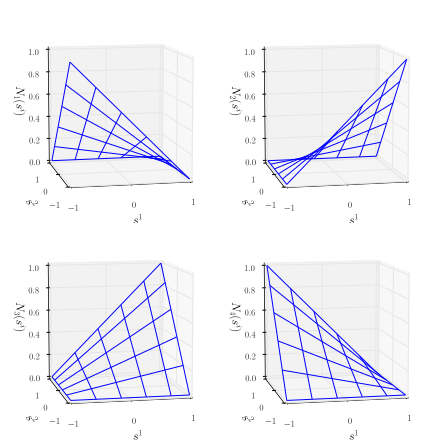

In [6]:
#Shape function plot
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.ticker as plticker

loc = plticker.MultipleLocator(base=1.0) # this locator puts ticks at regular intervals
    
fig, axes = plt.subplots(2,2, subplot_kw={"projection":'3d'}, figsize=(6,6) )
axes = np.ravel(axes) # make 1d array

s1 = np.linspace(-1,1, 20)
s2 = np.linspace(-1,1, 20)
S1,S2 = np.meshgrid(s1,s2)

# multiplication factors (-1)*s1, (-1)*s2 in the shape functions
mults = [(-1,-1),(1,-1),(1,1),(-1,1)]

for i, ax in zip( range(0,4), axes ):
    
    N = 0.25 * (1.0 + mults[i][0]*S1)*( 1 + mults[i][1]*S2)
    ax.set_xlabel(r"$s^1$")
    ax.set_ylabel(r"$s^2$")
    ax.set_zlabel(r"$N_%i(s^i)$" % (i+1))
    ax.view_init(elev=9, azim=-102)
    ax.plot_wireframe(S1, S2, N, rstride=4, cstride=4, color='b')
    
    for item in (ax.get_xticklabels() + ax.get_yticklabels()+ ax.get_zticklabels() ):
        item.set_fontsize(9)
   
    ax.xaxis.set_major_locator(loc)
    ax.yaxis.set_major_locator(loc)
    
plt.tight_layout(pad=-0)
plt.show()


Connectivity
---
We further enumerate all considered node displacements continuously and assemble them in a global generalized coordinate $\vq=[\vxi_1, \dotsArray, \vxi_n]^\transpM$. 

The connection between the local patch's generalized coordinates $\vq_p$ and the global one is encoded by the connectivity matrix $\mmL_p$ for patch $p$ as

$$
\vq_p := \mmL_p \vq \ . \label{eq:globalqtolocalq}
$$

Virtual Work
===
We employ the principle of virtual work which states that the total virtual work $\dvir W$ of the considered system, in this case a single body $\cB$, needs to vanish for all virtual displacements $\dvir \vxi$:

$$
\dvir W = \dvir W^{\text{dyn}} + \dvir W^{\text{int}} + \dvir W^{\text{ext}} = 0 \quad \forall \dvir \vxi \label{eq:virtualworkconst}
$$
It has to be noted that the virtual work formulation above already uses the constrained motion given in $\eqref{eq:patchmotionans}$.

**Sidenote:**
The constraint forces modeled by the internal virtual work contribution $\dvir W^{\text{int}}_{\text{C}}$, associated with the constrainment of the motion to the one given in $\eqref{eq:patchmotionans}$, is no more contained in $\dvir W^{\text{int}}$ in $\eqref{eq:virtualworkconst}$ due to fact that these constrained forces are modeled as being *perfect* or in other words they follow the constitutive law of d'Alembert-Lagrange which states that $\dvir W^{\text{int}}_{\text{C}}=0$ for all admissible virtual displacement (which we considered in $\eqref{eq:virtualworkconst}$).

Dynamic Contribution
---
The dynamic virtual work contribution is modeled according to Newton's second law as
$$
\dvir W^{\text{dyn}} := -\int_{\bodyB} \dvir \vxi^\transpM \dtt{\vxi} \diff{m} \ ,
$$
where $\diff{m} = \rho \diff{A}$ and $\diff{A} =\diff{\theta^1}\diff{\theta^2}$. 
The integral is evaluated over $\bodyB$ which represents the body $\cB$ in the cartesian plane $\RR{2}$.
Furthermore, the mass density is denoted by $\rho$ and constant over the body $\cB$.

Internal Contribution
---
The internal virtual work is modeled as integral of a tensor measure (which includes the stress tensor from classical continuum mechanics) over a 3-dimensional continuum $\cB$.
The internal virtual work can be stated as
$$
\dvir W^{\text{int}} := \int_{\bodyB} \mmP(\dvir \mmF) \diff{V} \ ,
$$
where the *stress tensor* $\mmP$ $\unitfrac{N}{m$^2$}$ is not a tensor field. Note that the variation of the deformation tensor $\dvir \mmF$ is unitless!

Since we are modeling a 2D continuum $\cB$, the virtual work turns into
$$
\dvir W^{\text{int}} := \int_{\bodyB} \mmP(\dvir \mmF) \diff{A} \ , \label{eq:intwork}
$$
where the *stress tensor* $\mmP$ in this example has units $\unitfrac{N}{m}$ and relates the normal $\vn_0 \in \RR{2}$ of a line element $\diff{s}$ (instead of an area element $\diff{A}$) in the reference configuration to the stress acting on the line element (instead of acting on the area element) in the current configuration.

External Contribution
---
The external virtual work contribution $\dvir W^{\text{ext}}$ accounting for forces acting on a 3-dimensional body $\cB$ is modeled as vector valued measures only and can be written in general as
$$
\dvir W^{\text{ext}} := \int_{\bodyB} \diff{\vF}(\dvir\vxi) =  \int_{B} \vB(\dvir\vxi) \diff V + \int_{\partial B} \vT(\dvir\vxi) \diff A \ ,
$$
where $\vB$ is an external volume-force vector field on the interal $B$ of body $\bodyB$ and $\vT$ is an external surface-force vector field on the boundary $\partial B$ of body $\bodyB$. Note that $\bodyB := B \cup \partial B$.

> <font color="red"> when modeling gravity with $\vB$, how are boundary points on $\partial B$ affected by the gravity force??? </font>

Since we are modeling a 2-dimensional continuum $\cB$ the external virtual work becomes:
$$
\dvir W^{\text{ext}} := \int_{\bodyB} \diff{\vF}(\dvir\vxi) =  \int_{B} \vB(\dvir\vxi) \diff A + \int_{\partial B} \vT(\dvir\vxi) \diff s \ ,
$$

The only external force we are considering in this simple example is the gravitational force.

### Gravity
Modeling gravity can be achieved by an external vector-valued area force $\vB := \ve_y g\diff{m}$ as
$$
\dvir W^{\text{ext}} = \int_{B} \dvir \vxi^\transpM \ve_y g\diff{m} = \int_{B} \dvir \vxi^\transpM \ve_y g\diff{m} = \dvir \vxi^\transpM \ve_y g \rho \diff{V}
$$

Equations of Motion
===
In the following, we are deriving the individual contributions in $\eqref{eq:virtualworkconst}$ step by step.

Let us start by rewritting again the Ansatz $\eqref{eq:motionans}$ by using $\eqref{eq:patchmotionansnodal},\eqref{eq:globalqtolocalq}$ as

$$
\begin{align}
\vxi(\vq,\theta^i,t) :&= \sum_{p} \ \chi_p(\theta^i) \ \vxi_p(\vq_p,s^i(\theta^i),t) \\
&= \sum_{p} \ \chi_p(\theta^i) \ \sum_{i=1}^{4} N_i(\vs) \vxi_i(t) \\
&= \sum_{p} \ \chi_p(\theta^i) \ \mmN(\vs) \mmL_p \vq \ .
\end{align}
$$

For the above to make sense: the local coordinates $\vs$ are a function of the global coordinates $\theta^1,\theta^2$ and the patch index $p \in \intRange{1}{n}$.
The global generalized coordinates $\vq := [\vq_1,\dotsArray,\vq_n]^\transpM$ are time-dependent and are the unknowns in the equation of motion derived in the following.

Dynamic Contribution
---
The dynamic contribution expands to
$$
\begin{align}
\dvir W^{\text{dyn}} :&= - \int_{\bodyB} \dvir \vxi^\transpM \dtt{\vxi} \diff{m} \\
&= -  \sum_p \int_{\Omega_p}\dvir \vxi_p^\transpM \dtt{\vxi}_p \ \rho\diff{A} \\
&= -  \sum_p \int_{\Omega_p}\dvir (\mmN\mmL_p\vq)^\transpM (\mmN\mmL_p\dtt{\vq}) \ \rho\diff{A} \\
&= -  \ \dvir \vq^\transpM \sum_p  \mmL_p^\transpM \underbrace{\int_{\Omega_p} \mmN^\transpM \mmN \ \rho\diff{A}}_{\mmM_p} \ \mmL_p \dtt{\vq} \\
&= - \dvir \vq^\transpM \mmM \dtt{\vq}
\end{align}
$$

The mass matrix contribution $\mmM_p$ (neither dependent on $\vq$ nor on $t$) for a patch $p$ can be evaluated as

$$
 \mmM_p = \int_{\Omega_p} \mmN^\transpM \mmN \ \rho\diff{A_p}  \ .
$$

With $\diff{A_p}=\diff{\theta^1} \diff{\theta^2} = \frac{A_p}{4} \diff{s^1}{s^2}$, where $A_p$ denotes the surface area of patch $p$ in the [reference configuration](#fig:bodymotion),
one gets
$$
 \mmM_p = \int_{-1}^{1}\int_{-1}^{1} \mmN^\transpM \mmN \ \frac{A_p\rho}{4}\diff{s^1}\diff{s^2} 
$$

### Calculate  Mass Matrix for Patch

In [53]:
import sympy as sp
from IPython.display import display, Math, Latex
from sympy import Rational

sp.init_printing(use_unicode=True)

# make symbols
s1, s2, A , rho = sp.symbols("s_1 s_2 A_p rho")

N = sp.Matrix([[ Rational(1,4) * (1-s1)*(1-s2), 
               Rational(1,4) * (1+s1)*(1-s2), 
               Rational(1,4) * (1+s1)*(1+s2), 
               Rational(1,4) * (1-s1)*(1-s2) ]])
I = A*rho/4 * N.T * N
Mp=I.integrate( (s1,-1,1) , (s2,-1,1) )

display(Math(r"\mmM_p =" + sp.latex(Mp)))

<IPython.core.display.Math object>

Internal Contribution
---
> <font color="red"> This section might contain many mistakes and parts which I do not fully understand  :-)</font>

Let us introduce the fields of primal base vectors $\vg_i(\theta^k,t) \in T_{\vx}\EE{2}$ (in the current configuration), its corresponding variation $\dvir \vg_i(\theta^k,t)$ and its associated dual base vectors $\vg^i(\theta^k,t) \in T^*_{\vx}\EE{2}$ as
$$
\vg_i := \pp{\vxi(\theta^i,t)}{\theta^i}, \quad \dvir \vg_i := \left(\pp{\dvir\vxi}{\theta^i}\right), \quad \vg^i = g^{-1/2} \vg_j \times \vg_k, \\ g^{-1/2} = \vg_1 \cdot (\vg_2 \times \vg_3) = \det(\vg_1,\vg_2,\vg_3)= \det\left[\pp{\xi^i}{\theta^j}\right] = J
$$
Note that $\dualp{\vg^i}{\vg_j} = \kroenS{i}{j}$, where $\kroenS{i}{j}$ denotes the Kronecker delta.
The variations are defined as $\dvir\vxi(\theta^i,t) = \pp{\hvect{\vxi}}{\varepsilon}( \theta^i,t,\varepsilon_0)$.

The deformation gradient $\mmF$ describes the following mapping:
$$
\begin{align}
\mmF \ : \quad T_{\vX}\EE{2} \qquad &\maps \qquad  T_{\vx}\EE{2} \\
        \diff{\vX} \qquad  &\mapsto \qquad  \diff{\vx} = \mmF \cdot \diff{\vX} \ ,
\end{align}
$$
meaning $\mmF$ maps the base vectors $\vG_i$ in the tangent space at $\vX$ in the initial configuration to the base vectors $\vg_i$ in the current configuration. The primal and  dual bases at the initial configuration $t=0$ are given by $\vG_i := \vg_i(\theta^k,0)$ and $\vG^i := \vg^i(\theta^k,0)$, respectively,

The deformation gradient $\mmF$ can be written as 
$$ \mmF := \vg_i \tensprod \vG^i  \qquad \Leftrightarrow \qquad \vg_i = \mmF \cdot \vG_i $$.

The dual map $\mmF^\transp$ of $\mmF$ is the transpose of $\mmF$ and maps like
$$
\begin{align}
\mmF^\transp \ : \quad T^*_{\vx}\EE{2} \qquad &\maps \qquad  T^*_{\vX}\EE{2} \ .
\end{align}
$$
Therefore, 
$$\mmF^\transp := (\mmF)^\transpM = \vG^i \tensprod \vg_i  \qquad \Leftrightarrow \qquad \vG^i = \mmF^\transp \cdot \vg^i $$.

According to $\eqref{eq:intwork}$, the internal virtual work contribution is the double-contraction between the Piola-Kirchhoff stress tensor $\mmP$ and the variation of $\mmF$:
$$
\begin{align}
\int_{\bodyB} \mmP : \dvir \mmF \diff{A} &= \int_{\bodyB} \underbrace{\tenskD{P}{_i}{^j} \vg^i}_{\vt^j} \tensprod \vG_j \ : \ \dvir \vg_k \tensprod \vG^k \diff{A} \\
&= \int_{\bodyB} \vt^j \cdot \dvir \vg_k \ \vG^k(\vG_j) \diff{A} \\
&=\int_{\bodyB} \vt^k \cdot \dvir \vg_k  \diff{A}
\end{align}
$$
> <font color="red"> How does we arrive at the formulation with the Cauchy stress?</font>
  $$\int_{\bodyB} \vsi : (\dvir \vg_i \tensprod \vg^i) g^{1/2}\diff{A}$$
  
  Is that the way??? :
  $$
     \int_{\bodyB} \mmP : \ \dvir \vg_k \tensprod \underbrace{\vG^k}_{\mmF^\transp \vg^k} \diff{A} = \int_{\bodyB} \mmP \cdot \mmF^\transp : \ \dvir \vg_k \tensprod \vg^k \diff{A}
  $$
  But the $g^{1/2}$ is not intuitive? Why? Because we did not use the volume forms with the wedge product????
  
  It holds that (should be correct):
  $$ 
  \begin{align}
  \vsi := g^{-1/2} \mmP \cdot \mmF^\transp  &= g^{-1/2} \underbrace{\tenskD{P}{_i}{^j} \vg^i}_{\vt^j} \tensprod \vG_j \cdot \vG^k \tensprod \vg_k \\
  &= g^{-1/2}  \vt^j \tensprod \vg_j
  \end{align}
  $$
  which is what stands on page 39 in [Eugster, S, 2016]